In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
madhankumar789_crop_yield_and_environmental_factors_2014_2023_path = kagglehub.dataset_download('madhankumar789/crop-yield-and-environmental-factors-2014-2023')

print('Data source import complete.')


In [ ]:
# Import required libraries
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/crop-yield-and-environmental-factors-2014-2023/crop_yield_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
data.head()


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


Explained Variance per Principal Component: [3.04543629e-01 2.10528171e-01 1.45246547e-01 9.56876484e-02
 6.94626297e-02 5.53607579e-02 3.80706374e-02 1.25013325e-02
 1.15918368e-02 9.57028719e-03 9.56926123e-03 9.56876035e-03
 9.56831623e-03 9.56390729e-03 5.09169564e-03 2.36621684e-03
 1.35580071e-03 1.41291325e-04 1.12648287e-04 6.16690415e-05
 3.69565256e-05 6.95348804e-32]
Cumulative Explained Variance: [0.30454363 0.5150718  0.66031835 0.756006   0.82546862 0.88082938
 0.91890002 0.93140135 0.94299319 0.95256348 0.96213274 0.9717015
 0.98126981 0.99083372 0.99592542 0.99829163 0.99964743 0.99978873
 0.99990137 0.99996304 1.         1.        ]


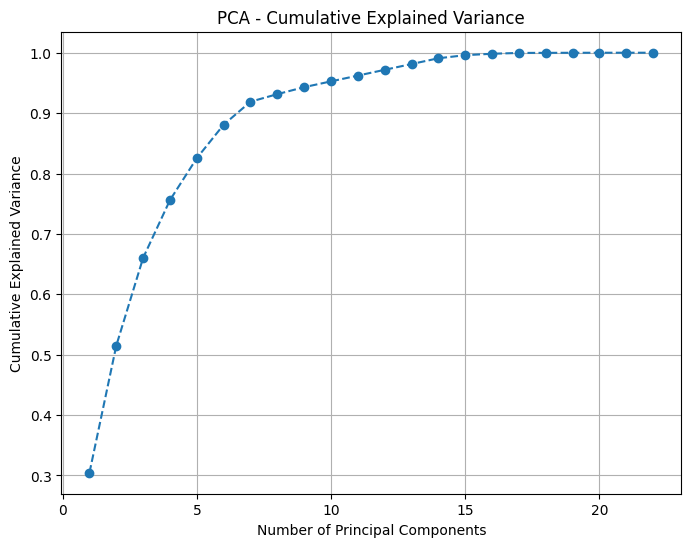

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Load dataset
file_path = '/kaggle/input/crop-yield-and-environmental-factors-2014-2023/crop_yield_dataset.csv'
data = pd.read_csv(file_path)

# Separate out numeric columns and standardize them
numeric_features = ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality']
data_numeric = data[numeric_features]

# Standardize the numeric features
scaler = StandardScaler()
data_numeric_scaled = scaler.fit_transform(data_numeric)

# Encode categorical features using one-hot encoding
data_encoded = pd.get_dummies(data[['Crop_Type', 'Soil_Type']], drop_first=True)

# Combine scaled numeric and encoded categorical features
data_final = pd.DataFrame(data_numeric_scaled, columns=numeric_features).join(data_encoded)

# Apply PCA
pca = PCA()
pca.fit(data_final)

# Check explained variance for each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance per Principal Component:", explained_variance)

# Cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative Explained Variance:", cumulative_variance)

# Plot the cumulative explained variance
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
file_path = '/kaggle/input/crop-yield-and-environmental-factors-2014-2023/crop_yield_dataset.csv'
data = pd.read_csv(file_path)

# Drop specified columns
data = data.drop(['Wind_Speed', 'Soil_Type'], axis=1)

# Convert Date to a datetime object and extract features (Year, Month)
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data = data.drop(['Date'], axis=1)

# Encode categorical features (Crop_Type) with one-hot encoding
data = pd.get_dummies(data, columns=['Crop_Type'], drop_first=True)

# Define features and target variable
X = data.drop(['Crop_Yield'], axis=1)
y = data['Crop_Yield']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 2.38219424152617
R-squared (R2): 0.9748284537873011


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define models to evaluate
models = {
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Dictionary to store results
results = {}

# Loop through each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    }

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).T
print("Regression Metrics for Different Models:\n", results_df)




Regression Metrics for Different Models:
                          MAE       RMSE        R2
Random Forest       2.382194   4.096961  0.974828
Linear Regression  11.930263  15.340854  0.647073
Gradient Boosting   5.184738   7.130377  0.923755
XGBoost             2.415916   4.011123  0.975872


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Define models to evaluate
models = {
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Dictionary to store results
results = {}

# Loop through each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    }

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).T
print("Regression Metrics for Different Models:\n", results_df)

# Step to save the Random Forest model if it performed well
best_model_name = 'Random Forest'
best_model = models[best_model_name]

# Save the Random Forest model
model_filename = 'random_forest_model.pkl'
joblib.dump(best_model, model_filename)

print(f"Model saved as {model_filename}")


Regression Metrics for Different Models:
                          MAE       RMSE        R2
Random Forest       2.382194   4.096961  0.974828
Linear Regression  11.930263  15.340854  0.647073
Gradient Boosting   5.184738   7.130377  0.923755
XGBoost             2.415916   4.011123  0.975872
Model saved as random_forest_model.pkl
